In [1]:
# imports
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# my project in Google Cloud used
PROJECT = "ba820-avs"

# some settings for pandas
pd.options.display.max_rows=125
pd.options.display.max_columns=100


In [ ]:
# auth against your BU GCP account 
#from google.colab import auth
#auth.authenticate_user()
#print('Authenticated')

In [2]:
# get the data from Big Query
# select all the records  
SQL = """
SELECT *
FROM `questrom.datasets.crm_campaign`
"""

crm = pd.io.gbq.read_gbq(SQL, PROJECT)

In [3]:
# what do we have
crm.shape

(71580, 3)

In [4]:
crm.head()

,crm_id,contcode,contcat
0,1559056674,None,None
1,2827154834,None,None
2,551329474,None,None
3,891404074,None,None
4,3078814423,None,None


In [ ]:
#### Exercise 1

In [5]:
# first, I am going to use granular codes, not the category
# so drop contcat
crm.drop(columns="contcat", inplace=True)


In [6]:
# second, drop dupes if any
crm.drop_duplicates(inplace=True)

In [7]:
# last confirm we have missing data
crm.isna().sum()

crm_id       0
contcode    19
dtype: int64

In [8]:
# we will remove these records
# even robust client data warehouses will have dirty data!
crm.dropna(inplace=True)

crm.isna().sum()

crm_id      0
contcode    0
dtype: int64

In [9]:
# ok, reshape
crm['flag'] = True

db = crm.pivot(index="crm_id", columns="contcode", values="flag")
db.fillna(False, inplace=True)

db.shape

(51157, 108)

In [ ]:
#### Exercise 2

In [10]:
# a quick glimpse
db.head(3)

contcode,ABR,ACT,APN,ATH,BAE,BBA,BCL,BOT,BSE,BXE,CAI,CBC,CHS,CMO,CSP,CWL,CWP,DEC,FER,FNA,FNE,HOB,IAR,IAS,ICR,IID,ILT,IME,IPF,ISA,ITI,IUR,LET,LLA,LLC,LLN,LNE,LOA,LOC,LON,LOS,LOT,LTC,MLB,NRC,OFR,OHA,OPP,OPR,PCC,...,ROA,ROC,RON,S5B,SAE,SLC,SLN,SLS,SOA,SOC,SON,SPE,SPN,SSE,TIS,TOE,TSA,VCA,VET,VEU,VGR,VHS,VHV,VIS,VJU,VMA,VMC,VRT,VSA,VSI,VTR,W00,WCG,WCP,WI1,WIF,WIT,WNR,WSP,WSR,WTT,WWF,WWI,WWL,WWM,WWP,WWR,WWT,WZF,WZT
crm_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
39399,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
65193,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
67182,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
# lets review how many "converted" via the CMO marketing code
converted = db.CMO.sum() 
print(converted)
db.CMO.mean()

7351


0.14369490001368337

In [12]:
#2 ten most frequent interactions
interactions = db.sum(axis=0)
interactions.sort_values(ascending=False)[:10]

contcode
CMO    7351
SPN    5215
SPE    5147
IPF    3972
LON    3451
LOS    3362
TSA    2792
VSI    2274
WTT    2256
APN    2219
dtype: int64

In [13]:
#3 avg number of transcations
user_ints = db.sum(axis=1)
user_ints.mean() 

1.378677404851731

/Users/alexandervonschwerdtner/opt/miniconda3/envs/ba820/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

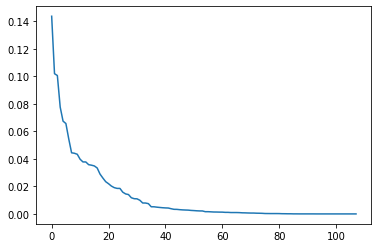

In [14]:
#4 item frequency
interactions_f = interactions / len(db)

interactions_f.sort_values(ascending=False, inplace=True)

sns.lineplot(range(len(interactions_f)), interactions_f.values)

In [ ]:
#### Exercise 3

In [ ]:
itemsets = apriori(db, min_support=.0002, use_colnames=True)

rules = association_rules(itemsets, metric="support", min_threshold=.0002)

In [ ]:
#### Exercise 4

In [ ]:
# a quick review across the outputs
rules.describe()

In [ ]:
# sample 10 rules
rules.sample(10).head()

In [ ]:
# top 10 lift
rules.sort_values("lift", ascending=False).head(10)

In [ ]:
# top 10 on count
# we can work backwards
rules['count'] = rules.support * len(db)

rules.sort_values('count', ascending=False).head(10)

In [ ]:
# keep just those with 6 on the LHS
# rules that always hold have infinite conviction 
# https://michael.hahsler.net/research/association_rules/measures.html#conviction
rules['lhs_len'] = rules.antecedents.apply(lambda x: len(x))

rules.loc[rules.lhs_len == 6, :].shape

In [ ]:
rules.loc[rules.lhs_len == 6, :].sample(5)

In [ ]:
#### Exercise 5

In [ ]:
# make a copy
strategy = rules.copy()

# calc rhs length
strategy['rhs_len'] = strategy.consequents.apply(lambda x: len(x))

In [ ]:
# keep jus the rules with the sales conversion on the right
ROWS = np.where((strategy.consequents=={'CMO'}) & (strategy.rhs_len == 1))

strategy = strategy.iloc[ROWS[0], :]

In [ ]:
# confirm this is what we intended
strategy.shape

strategy.head()

In [ ]:
# explore -- long sales pipelines == many interactions on the LHS

strategy.sort_values('lhs_len', ascending=False).head(10)

In [ ]:
# some plots

sns.scatterplot(data=strategy, x="support", y="confidence", hue="lift")

In [ ]:
# number of lhs items balanced against support
sns.boxplot(data=strategy, x="lhs_len", y="confidence", color="grey")

## what does this suggest about a customers interactions WHEN, we know that they converted?

In [ ]:
# fastest path
rule1 = strategy.loc[strategy.lhs_len == 1, :]
rule1.sort_values("lift", ascending=False, inplace=True)

rule1.head(10)

In [ ]:
# above, you might recommend flagging those that only have TSA interaction
# or to provide options, by say, filtering on sample size > 500?